In [1]:
!pip install --quiet quandl plotly git+https://github.com/ethho/memoize.git lmfit
!wget -O final_proj.py https://github.com/ethho/finm-33150/raw/main/final_proj.py

--2023-03-03 17:10:54--  https://github.com/ethho/finm-33150/raw/main/final_proj.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ethho/finm-33150/main/final_proj.py [following]
--2023-03-03 17:10:54--  https://raw.githubusercontent.com/ethho/finm-33150/main/final_proj.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15192 (15K) [text/plain]
Saving to: ‘final_proj.py’

final_proj.py       100%[===================>]  14.84K  --.-KB/s    in 0.002s  

2023-03-03 17:10:55 (7.55 MB/s) - ‘final_proj.py’ saved [15192/15192]



In [2]:
!echo '{"NASTAQ_DATA_API_KEY": "XXXmy_quandl_api_keyXXX"}' > ./secrets.json

In [16]:
import os
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import final_proj

# 20230302_dummy_check_uszcb

Ethan Ho 3/2/2023

@mpcs
@finm

----

The purpose of this notebook is to perform initial analysis of the `uszcb.csv` file generated by `final_proj.py`. I want to check that the rates and factors I calculated in `final_proj.py` are reasonable.

# Fetch Data

We can fetch data by reading an existing `uszcb.csv` file using `final_proj.read_uszcb`, or creating it with `final_proj.main`:

In [17]:
df = final_proj.read_uszcb('./data/uszcb.csv')
df

4                                                             \
            fwd fwd_factor pr_s      pr_t      spot       val       zcb   
date                                                                      
1990-01-03  NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-01-31  NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-02-28  NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-03-28  NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-04-25  NaN        NaN  1.0       NaN       NaN       NaN       NaN   
...         ...        ...  ...       ...       ...       ...       ...   
2022-08-03  NaN   0.998315  1.0  0.998315  0.021928  1.001043  0.021928   
2022-08-31  NaN   0.998162  1.0  0.998162  0.023921  1.001688  0.023921   
2022-09-28  NaN   0.997986  1.0  0.997986  0.026214  1.001842  0.026214   
2022-10-26  NaN   0.997290  1.0  0.997290  0.035284  1.002018  0.035284   
2022-11-23  NaN   0.996846  1.0  0.996846  0.041065  1.002718  0.041065   

                13                         ...      1040                      \
                 fwd fwd_factor      pr_s  ...      spot       val       zcb   
date                                       ...                                 
1990-01-03       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-01-31       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-02-28       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-03-28       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-04-25       NaN        NaN       NaN  ...       NaN       NaN       NaN   
...              ...        ...       ...  ...       ...       ...       ...   
2022-08-03  0.028307   0.997825  0.995907  ...  0.031596  1.003571  0.032211   
2022-08-31  0.035084   0.997305  0.995334  ...  0.035184  1.003607  0.035658   
2022-09-28  0.041563   0.996808  0.994739  ...  0.039669  1.004651  0.039703   
2022-10-26  0.046646   0.996418  0.993369  ...  0.043656  1.003601  0.043957   
2022-11-23  0.046646   0.996418  0.992651  ...  0.039570  1.003761  0.039532   

                1560                                                     \
                 fwd fwd_factor      pr_s      pr_t      spot       val   
date                                                                      
1990-01-03       NaN        NaN       NaN       NaN  0.080136       NaN   
1990-01-31       NaN        NaN       NaN       NaN  0.084322       NaN   
1990-02-28       NaN        NaN       NaN       NaN  0.085119       NaN   
1990-03-28       NaN        NaN       NaN       NaN  0.084422       NaN   
1990-04-25       NaN        NaN       NaN       NaN  0.089505       NaN   
...              ...        ...       ...       ...       ...       ...   
2022-08-03  0.025224   0.998062  1.001769  0.999828  0.029503  1.002737   
2022-08-31  0.027332   0.997900  1.003525  1.001417  0.032593  1.003698   
2022-09-28  0.031221   0.997601  1.007199  1.004783  0.036878  1.005774   
2022-10-26  0.037922   0.997087  1.006392  1.003461  0.041762  1.001601   
2022-11-23  0.032384   0.997512  1.007546  1.005039  0.037277  1.004071   

                      
                 zcb  
date                  
1990-01-03       NaN  
1990-01-31       NaN  
1990-02-28       NaN  
1990-03-28       NaN  
1990-04-25       NaN  
...              ...  
2022-08-03  0.028984  
2022-08-31  0.031566  
2022-09-28  0.035111  
2022-10-26  0.040476  
2022-11-23  0.035712  

[430 rows x 77 columns]

Alternatively, we can generate it from scratch:

In [18]:
df = final_proj.main(zcb_out_fp='./data/uszcb.csv')
df

Using cache fp='data/memoize/fetch_quandl_yc_7609035_20230303.csv' to write results of function fetch_quandl_yc
Using cached call from data/memoize/fetch_quandl_yc_7609035_20230222.csv
Wrote US ZCB rates to ./data/uszcb.csv


tenor_wk   4.0                                                             \
metric        fwd fwd_factor pr_s      pr_t      spot       val       zcb   
date                                                                        
1990-01-03    NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-01-31    NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-02-28    NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-03-28    NaN        NaN  1.0       NaN       NaN       NaN       NaN   
1990-04-25    NaN        NaN  1.0       NaN       NaN       NaN       NaN   
...           ...        ...  ...       ...       ...       ...       ...   
2022-08-03    NaN   1.009260  1.0  1.009260  0.021928  0.994304  0.021928   
2022-08-31    NaN   1.010100  1.0  1.010100  0.023921  0.990825  0.023921   
2022-09-28    NaN   1.011066  1.0  1.011066  0.026214  0.990001  0.026214   
2022-10-26    NaN   1.014884  1.0  1.014884  0.035284  0.989055  0.035284   
2022-11-23    NaN   1.017314  1.0  1.017314  0.041065  0.985335  0.041065   

tenor_wk      13.0                         ...    1040.0                      \
metric           fwd fwd_factor      pr_s  ...      spot       val       zcb   
date                                       ...                                 
1990-01-03       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-01-31       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-02-28       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-03-28       NaN        NaN       NaN  ...       NaN       NaN       NaN   
1990-04-25       NaN        NaN       NaN  ...       NaN       NaN       NaN   
...              ...        ...       ...  ...       ...       ...       ...   
2022-08-03  0.028307   0.997825  1.008414  ...  0.031596  1.003571  0.032211   
2022-08-31  0.035084   0.997305  1.010017  ...  0.035184  1.003607  0.035658   
2022-09-28  0.041563   0.996808  1.011594  ...  0.039669  1.004651  0.039703   
2022-10-26  0.046646   0.996418  1.013716  ...  0.043656  1.003601  0.043957   
2022-11-23  0.046646   0.996418  1.014418  ...  0.039570  1.003761  0.039532   

tenor_wk      1560.0                                                     \
metric           fwd fwd_factor      pr_s      pr_t      spot       val   
date                                                                      
1990-01-03       NaN        NaN       NaN       NaN  0.080136       NaN   
1990-01-31       NaN        NaN       NaN       NaN  0.084322       NaN   
1990-02-28       NaN        NaN       NaN       NaN  0.085119       NaN   
1990-03-28       NaN        NaN       NaN       NaN  0.084422       NaN   
1990-04-25       NaN        NaN       NaN       NaN  0.089505       NaN   
...              ...        ...       ...       ...       ...       ...   
2022-08-03  0.025224   0.998062  1.001769  0.999828  0.029503  1.002737   
2022-08-31  0.027332   0.997900  1.003525  1.001417  0.032593  1.003698   
2022-09-28  0.031221   0.997601  1.007199  1.004783  0.036878  1.005774   
2022-10-26  0.037922   0.997087  1.006392  1.003461  0.041762  1.001601   
2022-11-23  0.032384   0.997512  1.007546  1.005039  0.037277  1.004071   

tenor_wk              
metric           zcb  
date                  
1990-01-03       NaN  
1990-01-31       NaN  
1990-02-28       NaN  
1990-03-28       NaN  
1990-04-25       NaN  
...              ...  
2022-08-03  0.028984  
2022-08-31  0.031566  
2022-09-28  0.035111  
2022-10-26  0.040476  
2022-11-23  0.035712  

[430 rows x 77 columns]

# Plot Yield Curves at Different Dates

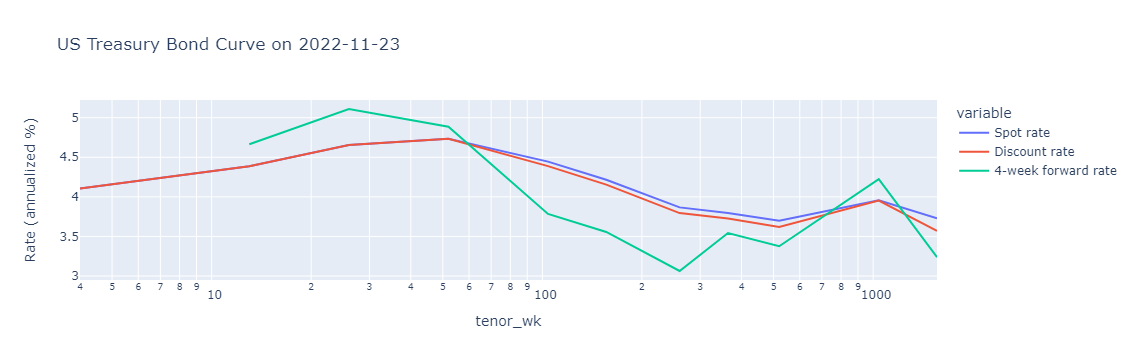

In [19]:
def plot_yc(date='2022-11-23', **kw):
    fig = px.line(
        df.stack(1).loc[(date, slice(None))].T.dropna(axis=0, how='all').rename(columns={
            'spot': 'Spot rate',
            'zcb': 'Discount rate',
            'fwd': '4-week forward rate',
        }) * 100,
        y=['Spot rate', 'Discount rate', '4-week forward rate'],
        labels = {
            'index': 'Tenor (weeks)',
            'value': 'Rate (annualized %)',
        },
        title=f'US Treasury Bond Curve on {date}',
        **kw
    )
    return fig

plot_yc('2022-11-23', log_x=True)

Intuitively, the forward rate should look something like the derivative of the spot rate.

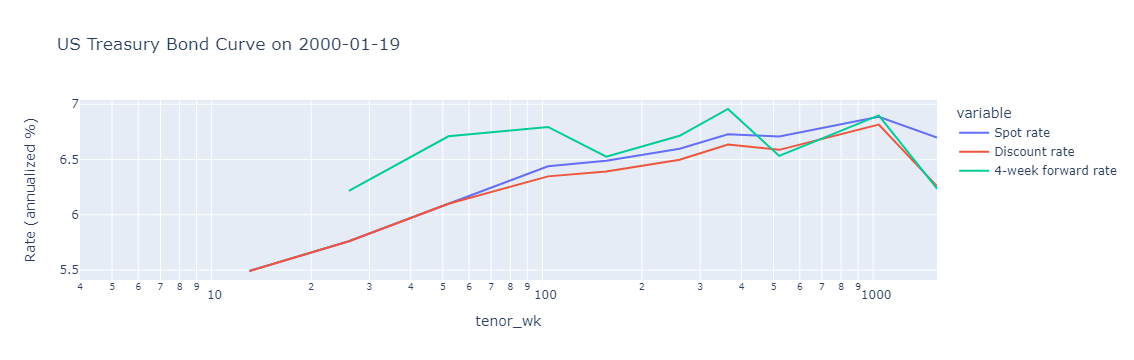

In [20]:
plot_yc('2000-01-19', log_x=True)

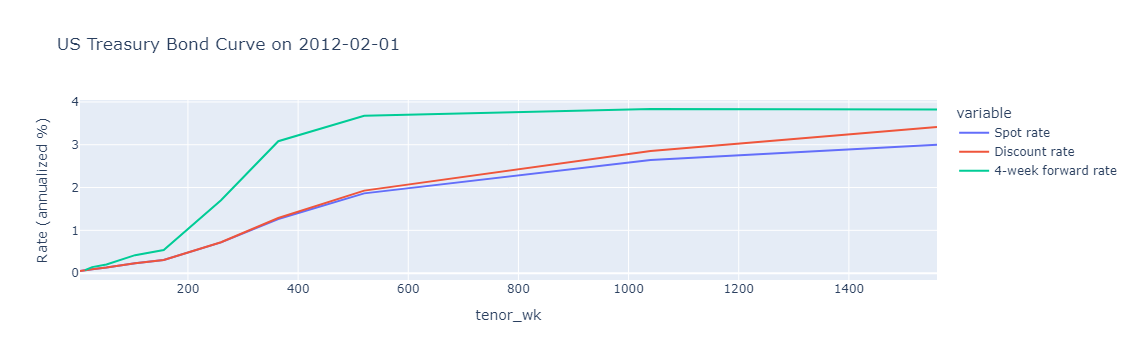

In [21]:
plot_yc('2012-02-01', log_x=False)

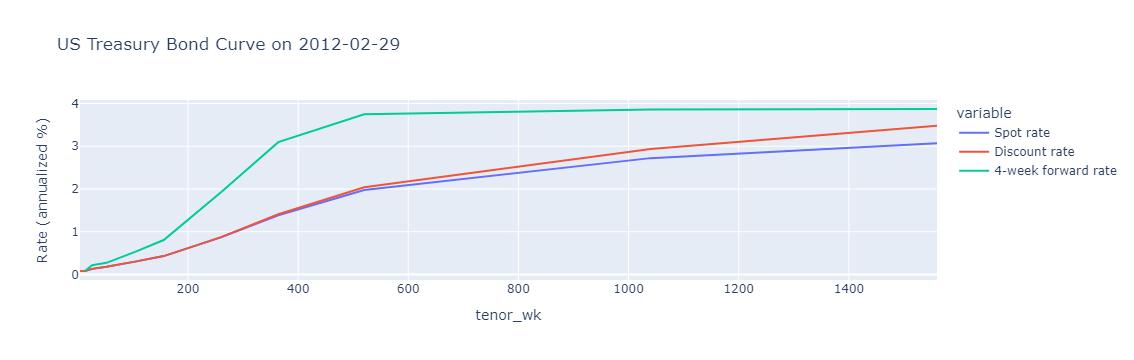

In [22]:
plot_yc('2012-02-29', log_x=False)

In [23]:
(df.loc[:, (slice(None), 'fwd')] < 0).any()

tenor_wk  metric
4.0       fwd       False
13.0      fwd        True
26.0      fwd       False
52.0      fwd       False
104.0     fwd       False
156.0     fwd       False
260.0     fwd       False
364.0     fwd       False
520.0     fwd       False
1040.0    fwd       False
1560.0    fwd       False
dtype: bool

We see that there are some negative values for the forward rate of the 13-week T-bill:

In [24]:
df[df.loc[:, (13., 'fwd')] < 0][(13., 'fwd')]

date
2008-09-17   -0.000100
2013-10-09   -0.001595
2014-12-03   -0.000100
2021-11-24   -0.000199
Name: (13.0, fwd), dtype: float64

# Plot Bond Value Over Time

Value was calculated based on the theory from Brian's carry trade lecture. I calculated value (`val`) as the return on a bond assuming that we bought the bond 4 weeks ago and sold it today.

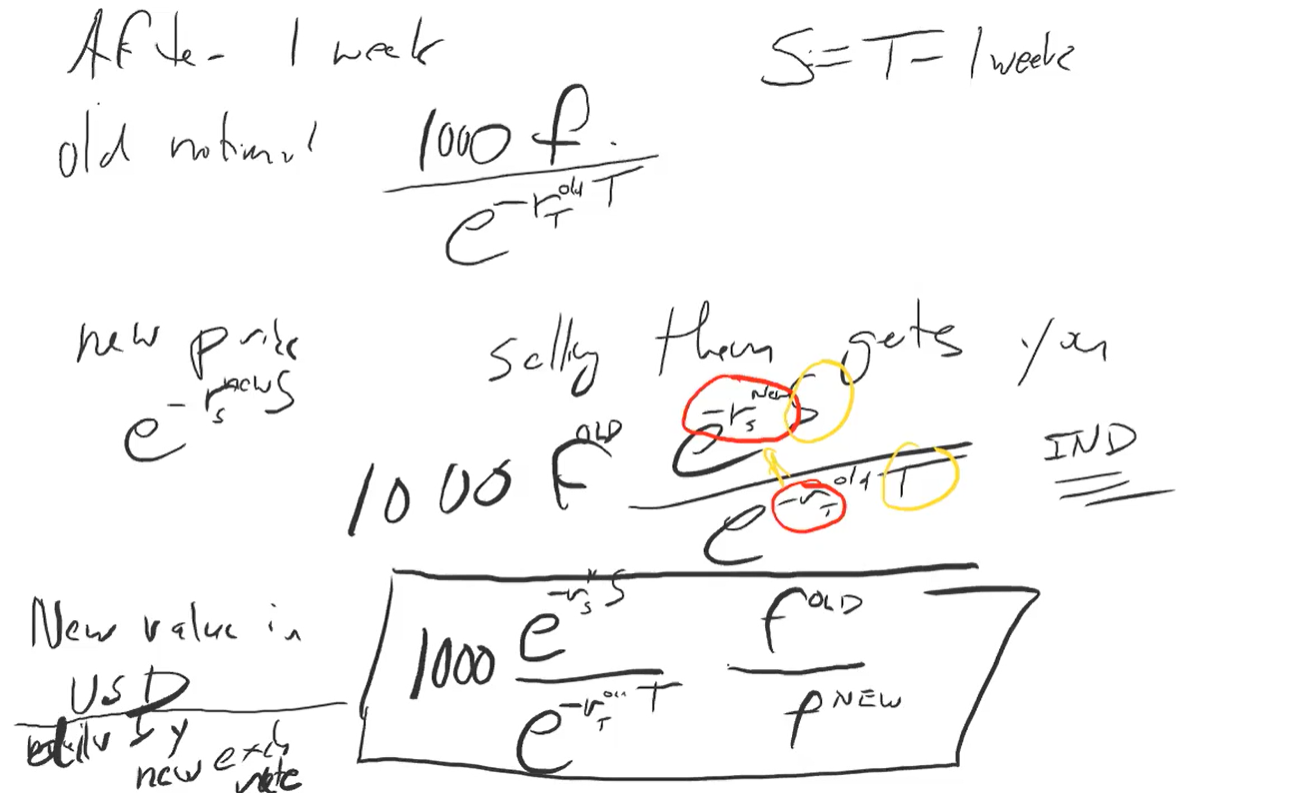

Tenors represented in this dataset (in weeks) are:

In [25]:
df.columns.get_level_values(level=0).unique()

Float64Index([4.0, 13.0, 26.0, 52.0, 104.0, 156.0, 260.0, 364.0, 520.0, 1040.0,
              1560.0],
             dtype='float64', name='tenor_wk')

We can plot the rate of return every month for different tenors:

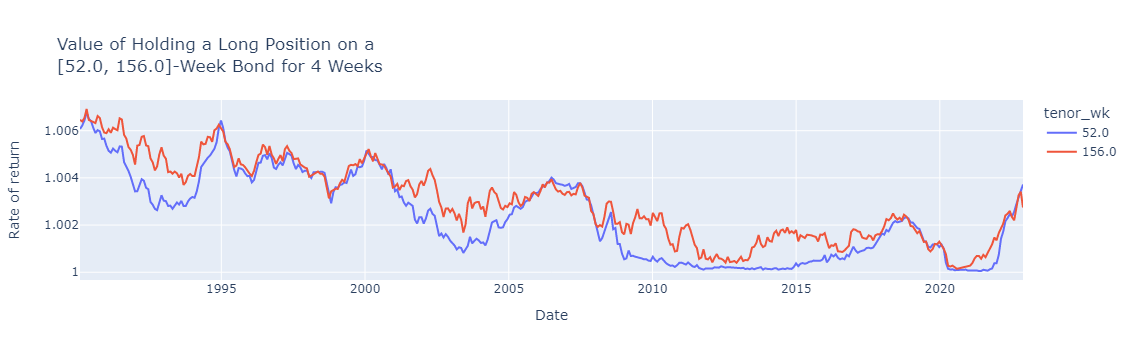

In [26]:
def plot_val(tenor=104., **kw):
    fig = px.line(
        df.stack(1).swaplevel().loc['val', tenor],
        labels = {
            'date': 'Date',
            'value': 'Rate of return',
        },
        title=f'Value of Holding a Long Position on a<br>{tenor}-Week Bond for 4 Weeks',
        **kw
    )
    return fig

plot_val(tenor=[52., 156.])

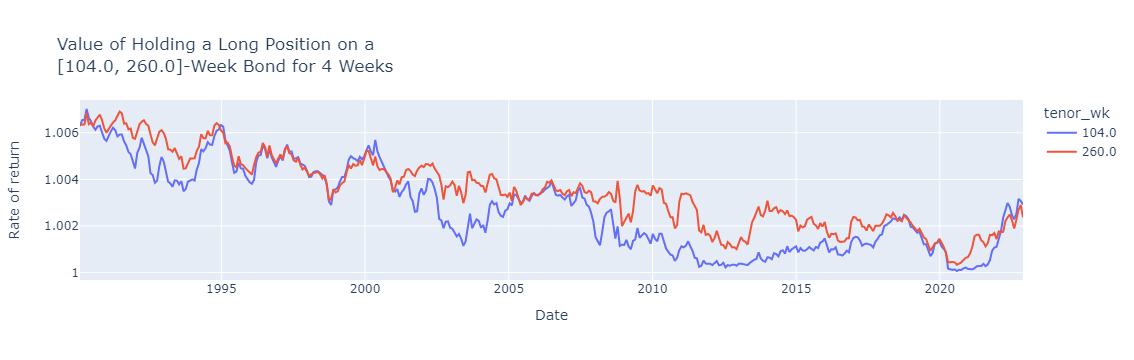

In [27]:
plot_val(tenor=[104., 260.])

Please [raise a GitHub issue](https://github.com/ethho/finm-33150/blob/main/final_proj.py) if there are errors or unexpected values in this analysis.